In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

## Load the data

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
store_df = pd.read_csv("store.csv")

C:\Users\pc\AppData\Local\Temp\ipykernel_9556\1631735476.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("train.csv")


In [3]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


## Transform the data

Merging Train and Test's dataframes with the Store dataframe

In [5]:
train_merged_df = train_df.merge(store_df, how='left', on='Store')
test_merged_df = test_df.merge(store_df, how='left', on='Store')

In [6]:
train_merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
train_merged_df['Date'] = pd.to_datetime(train_merged_df['Date'])
test_merged_df['Date'] = pd.to_datetime(test_merged_df['Date'])

In [8]:
train_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [9]:
round(train_merged_df.describe().T,2)

,count,mean,min,25%,50%,75%,max,std
Store,1017209.0,558.429727,1.0,280.0,558.0,838.0,1115.0,321.908651
DayOfWeek,1017209.0,3.998341,1.0,2.0,4.0,6.0,7.0,1.997391
Date,1017209,2014-04-11 01:30:42.846061824,2013-01-01 00:00:00,2013-08-17 00:00:00,2014-04-02 00:00:00,2014-12-12 00:00:00,2015-07-31 00:00:00,NaN
Sales,1017209.0,5773.818972,0.0,3727.0,5744.0,7856.0,41551.0,3849.926175
Customers,1017209.0,633.145946,0.0,405.0,609.0,837.0,7388.0,464.411734
Open,1017209.0,0.830107,0.0,1.0,1.0,1.0,1.0,0.375539
Promo,1017209.0,0.381515,0.0,0.0,0.0,1.0,1.0,0.485759
SchoolHoliday,1017209.0,0.178647,0.0,0.0,0.0,0.0,1.0,0.383056
CompetitionDistance,1014567.0,5430.085652,20.0,710.0,2330.0,6890.0,75860.0,7715.3237
CompetitionOpenSinceMonth,693861.0,7.222866,1.0,4.0,8.0,10.0,12.0,3.211832


Check for duplicated values

In [10]:
train_merged_df.duplicated().sum()

np.int64(0)

Remove the rows where the value of the 'Open' column = 0

In [11]:
train_merged_df = train_merged_df[train_merged_df['Open'] == 1]
train_merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


## Exploratory Data Analysis (EDA)

Correlation Coefficient of numerical columns compare to the target column (Sales)

In [12]:
train_merged_df.select_dtypes(include=np.number).corr()['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

## Feature Engineering

Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources. 


For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End


In [13]:
train_merged_df['Day'] = train_merged_df['Date'].dt.day
train_merged_df['Month'] = train_merged_df['Date'].dt.month
train_merged_df['Year'] = train_merged_df['Date'].dt.year

test_merged_df['Day'] = test_merged_df['Date'].dt.day
test_merged_df['Month'] = test_merged_df['Date'].dt.month
test_merged_df['Year'] = test_merged_df['Date'].dt.year

C:\Users\pc\AppData\Local\Temp\ipykernel_9556\3174230202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_merged_df['Day'] = train_merged_df['Date'].dt.day
C:\Users\pc\AppData\Local\Temp\ipykernel_9556\3174230202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_merged_df['Month'] = train_merged_df['Date'].dt.month
C:\Users\pc\AppData\Local\Temp\ipykernel_9556\3174230202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

Correlation Coefficient of Day, Month, Year columns

In [14]:
correlations = train_merged_df[['Sales', 'Day', 'Month', 'Year']].corr()
sales_correlations = correlations['Sales'][['Day', 'Month', 'Year']].sort_values(ascending=False)
print(sales_correlations)

Month    0.073600
Year     0.036169
Day     -0.051849
Name: Sales, dtype: float64


In [15]:
# sns.barplot(data = train_merged_df, x='Year', y='Sales')

In [16]:
# sns.barplot(data = train_merged_df, x='Month', y='Sales')

# Data Preparation

## Train/Test/Validation Split

In [17]:
from sklearn.model_selection import train_test_split

Split the data into Train (75%) and Validation (25%) subset sorted by Date

In [18]:
train_size = int(.75 * len(train_merged_df))
train_size

633294

In [19]:
sorted_df = train_merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [20]:
len(train_df), len(val_df)

(633294, 211098)

In [21]:
train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
1017190,1097,2,2013-01-01,5961,1405,1,0,a,1,b,...,720.0,3.0,2002.0,0,NaN,NaN,NaN,1,1,2013
1016179,85,2,2013-01-01,4220,619,1,0,a,1,b,...,1870.0,10.0,2011.0,0,NaN,NaN,NaN,1,1,2013
1016353,259,2,2013-01-01,6851,1444,1,0,a,1,b,...,210.0,NaN,NaN,0,NaN,NaN,NaN,1,1,2013
1016356,262,2,2013-01-01,17267,2875,1,0,a,1,b,...,1180.0,5.0,2013.0,0,NaN,NaN,NaN,1,1,2013
1016368,274,2,2013-01-01,3102,729,1,0,a,1,b,...,3640.0,NaN,NaN,1,10.0,2013.0,"Jan,Apr,Jul,Oct",1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,745,3,2014-12-10,6897,657,1,0,0,0,a,...,17650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct",10,12,2014
256642,756,3,2014-12-10,15736,2292,1,0,0,0,a,...,50.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct",10,12,2014
256634,747,3,2014-12-10,7444,608,1,0,0,0,c,...,45740.0,8.0,2008.0,0,NaN,NaN,NaN,10,12,2014
256633,746,3,2014-12-10,5207,474,1,0,0,0,d,...,4330.0,2.0,2011.0,1,35.0,2011.0,"Mar,Jun,Sept,Dec",10,12,2014


## Input and Target columns

In [22]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']
target_col = 'Sales'

In [23]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_merged_df[input_cols].copy()

In [24]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

## Imputation, Scaling and Encoding

Imputation

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_inputs[numeric_cols])

SimpleImputer()

In [27]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

In [30]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
train_inputs[categorical_cols] = train_inputs[categorical_cols].astype(str)
val_inputs[categorical_cols] = val_inputs[categorical_cols].astype(str)
test_inputs[categorical_cols] = test_inputs[categorical_cols].astype(str)

In [33]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [34]:
encoded_cols

['DayOfWeek_1',
 'DayOfWeek_2',
 'DayOfWeek_3',
 'DayOfWeek_4',
 'DayOfWeek_5',
 'DayOfWeek_6',
 'DayOfWeek_7',
 'Promo_0',
 'Promo_1',
 'StateHoliday_0',
 'StateHoliday_a',
 'StateHoliday_b',
 'StateHoliday_c',
 'StoreType_a',
 'StoreType_b',
 'StoreType_c',
 'StoreType_d',
 'Assortment_a',
 'Assortment_b',
 'Assortment_c']

In [35]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [36]:
train_inputs

,Store,DayOfWeek,Promo,StateHoliday,StoreType,Assortment,Day,Month,Year,DayOfWeek_1,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,2,0,a,b,a,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,2,0,a,b,b,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,3,0,0,a,a,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,3,0,0,a,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,3,0,0,c,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,3,0,0,d,c,0.3,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


The final data used for building models

In [37]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [38]:
X_train

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,...,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


# Build models

## Baseline Model (Linear Regression)

In [39]:
from sklearn.linear_model import LinearRegression

### Train the model with the training's data and target

Train the model

In [40]:
LinearRegression_model = LinearRegression(n_jobs=-1)

LinearRegression_model.fit(X_train, train_targets)

LinearRegression(n_jobs=-1)

Weight of Features

In [41]:
LinearRegression_features_weight_df = pd.DataFrame({
    'Features': X_train.columns,
    'Weight': LinearRegression_model.coef_
})

LinearRegression_features_weight_df.sort_values('Weight', ascending=False)

,Features,Weight
4,DayOfWeek_1,1.744068e+15
10,DayOfWeek_7,1.744068e+15
8,DayOfWeek_5,1.744068e+15
9,DayOfWeek_6,1.744068e+15
5,DayOfWeek_2,1.744068e+15
6,DayOfWeek_3,1.744068e+15
7,DayOfWeek_4,1.744068e+15
18,StoreType_b,6.970359e+14
17,StoreType_a,6.970359e+14
19,StoreType_c,6.970359e+14


Intercept of the model

In [42]:
LinearRegression_model.intercept_

np.float64(9570545587859570.0)

### Prediction

Prediction on the X_train dataframe

In [43]:
train_preds = LinearRegression_model.predict(X_train)

LinearRegression_preds = pd.DataFrame({
    'Actual': train_targets,
    'Predict': LinearRegression_model.predict(X_train)
})

LinearRegression_preds

,Actual,Predict
1017190,5961,7128.0
1016179,4220,10594.0
1016353,6851,7050.0
1016356,17267,10610.0
1016368,3102,7052.0
...,...,...
256632,6897,5622.0
256642,15736,6362.0
256634,7444,6250.0
256633,5207,6000.0


Prediction on the X_val dataframe

In [44]:
val_preds = LinearRegression_model.predict(X_val)

LinearRegression_preds = pd.DataFrame({
    'Actual': val_targets,
    'Predict': LinearRegression_model.predict(X_val)
})

LinearRegression_preds

,Actual,Predict
256637,3720,5622.0
256638,4258,5622.0
256639,7170,5998.0
256640,7359,6250.0
256635,4579,5260.0
...,...,...
744,8363,8014.0
745,9082,8390.0
746,10708,8642.0
740,11253,8392.0


### Evaluation of the Baseline Model

In [45]:
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error

Root Mean Squared Error (RMSE)

In [46]:
LinearRegression_train_rmse = root_mean_squared_error(train_targets, train_preds)
LinearRegression_val_rmse = root_mean_squared_error(val_targets, val_preds)

LinearRegression_rmse_df = pd.DataFrame({
    'Dataset': ['Training', 'Validation'],
    'RMSE': [LinearRegression_train_rmse, LinearRegression_val_rmse]
})

LinearRegression_rmse_df

,Dataset,RMSE
0,Training,2741.564861
1,Validation,2817.584670


Mean Absolute Error (MAE)

In [47]:
train_mae = round(mean_absolute_error(train_targets, train_preds), 2)
val_mae = round(mean_absolute_error(val_targets, val_preds), 2)

LinearRegression_mae_df = pd.DataFrame({
    'Dataset': ['Training', 'Validation'],
    'MAE': [train_mae, val_mae]
})

LinearRegression_mae_df

,Dataset,MAE
0,Training,1996.62
1,Validation,2013.83


## Different Models

### Function to compute Models' RMSE on training and valadation data

In [48]:
def try_model(model):
    # Fit the model
    model.fit(X_train, train_targets)
    
    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Compute RMSE
    train_rmse = root_mean_squared_error(train_targets, train_preds)
    val_rmse = root_mean_squared_error(val_targets, val_preds)
    return train_rmse, val_rmse

### Linear Models

In [49]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor

In [50]:
ridge_rmse = try_model(Ridge())
ridge_rmse

(np.float64(2741.587195081445), np.float64(2817.7784665409863))

In [51]:
ElasticNet_rmse = try_model(ElasticNet())
ElasticNet_rmse

(np.float64(2879.0432103903954), np.float64(2972.6658860503385))

### Tree based Models

Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [53]:
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_rmse = try_model(decision_tree_model)
decision_tree_rmse

(np.float64(0.0), np.float64(1559.7378600480247))

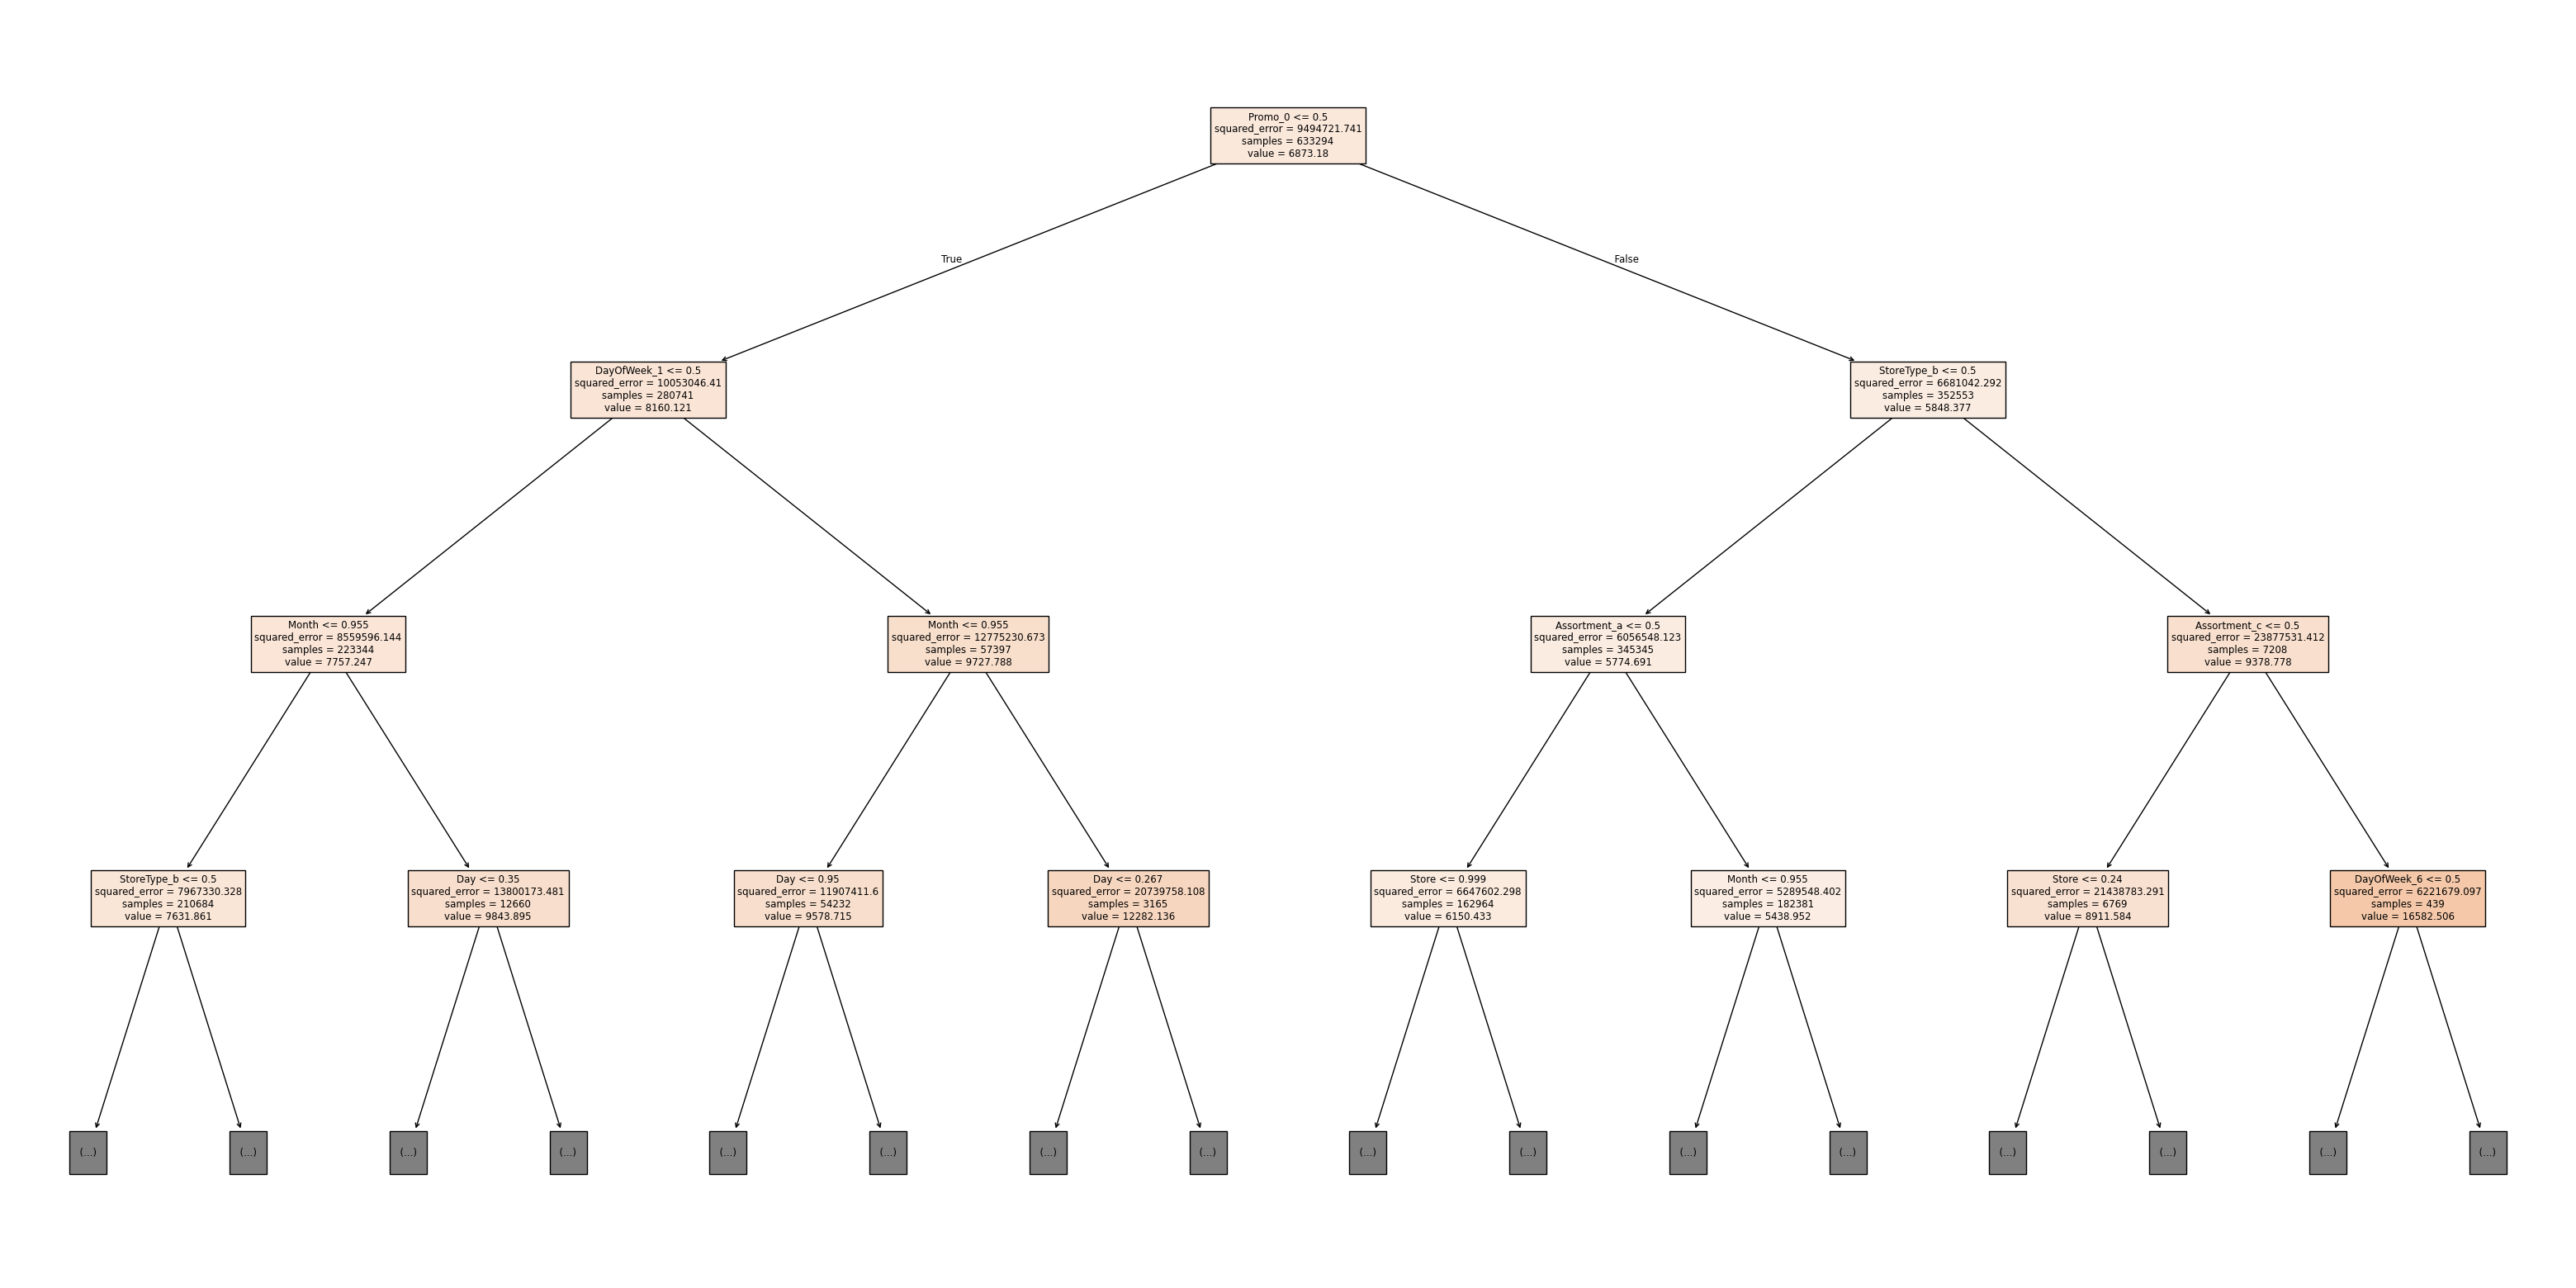

In [54]:
plt.figure(figsize=(40, 20))
plot_tree(decision_tree_model, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_rmse = try_model(rf)
rf_rmse

(np.float64(474.9198974666898), np.float64(1371.7321923469985))

## Models' Comparison

In [57]:
model_names = ['LinearRegression', 'Ridge', 'ElasticNet', 'DecisionTree', 'RandomForest']
train_rmse = [LinearRegression_train_rmse, ridge_rmse[0], ElasticNet_rmse[0], decision_tree_rmse[0], rf_rmse[0]]
val_rmse = [LinearRegression_val_rmse, ridge_rmse[1], ElasticNet_rmse[1], decision_tree_rmse[1], rf_rmse[1]]

model_comparison_df = pd.DataFrame({
    'Model': model_names,
    'Training RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

model_comparison_df

,Model,Training RMSE,Validation RMSE
0,LinearRegression,2741.564861,2817.584670
1,Ridge,2741.587195,2817.778467
2,ElasticNet,2879.043210,2972.665886
3,DecisionTree,0.000000,1559.737860
4,RandomForest,474.919897,1371.732192


Sorted by ascending Validation RMSE

In [58]:
model_comparison_df.sort_values('Validation RMSE', ascending=True)

,Model,Training RMSE,Validation RMSE
4,RandomForest,474.919897,1371.732192
3,DecisionTree,0.000000,1559.737860
0,LinearRegression,2741.564861,2817.584670
1,Ridge,2741.587195,2817.778467
2,ElasticNet,2879.043210,2972.665886


<b>From the comparison, we can conclude that RandomForest is the best model for this problem -> Choose Random Forest as the model<b>

## Hyperparameter Optimization With Random Search and Grid Search

### Grid Search

In [59]:
# from sklearn.model_selection import GridSearchCV

In [60]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [10, 20, 30, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2']
# }

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     verbose=2
# )

In [61]:
# grid_search.fit(X_train, train_targets)

# # Best parameters and model evaluation
# print("Best Parameters: ", grid_search.best_params_)
# best_rf = grid_search.best_estimator_
# y_pred = best_rf.predict(X_train)
# rmse = root_mean_squared_error(train_targets, y_pred)
# print("RMSE: ", rmse)

### Randomized Search

In [62]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
# # Define parameter distributions
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [10, 20, 30, 40, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None],
#     'bootstrap': [True, False]
# }

# # Set up RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=50,
#     cv=5,
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,
#     random_state=42,
#     verbose=2
# )

In [ ]:
# random_search.fit(X_train, train_targets)

# # Best parameters and model evaluation
# print("Best Parameters: ", random_search.best_params_)
# best_rf = random_search.best_estimator_
# y_pred = best_rf.predict(X_train)
# rmse = root_mean_squared_error(train_targets, y_pred)
# print("RMSE: ", rmse)

# Predict on the Test data and submit 

In [84]:
test_preds = rf.predict(X_test)

In [85]:
test_preds

array([ 4258.01,  7713.83,  8775.7 , ...,  5954.68, 20823.07,  6748.48])

In [87]:
submission_df = pd.read_csv("sample_submission.csv")

In [88]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


In [89]:
submission_df['Sales'] = test_preds * test_df['Open'].astype('float')

In [90]:
submission_df.fillna(0, inplace=True)

In [91]:
submission_df.to_csv('submission.csv', index=None)